In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import numpy as np
import os
from tqdm import notebook

In [2]:
def find_csv_filenames( path_to_dir, suffix=".csv" ):
    filenames = os.listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

def randargmax(b, **kw):
  """ a random tie-breaking argmax"""
  return np.argmax(np.random.random(b.shape) * (b==b.max()), **kw)

In [3]:
with open('/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/ALL_test_data.sav', 'rb') as fr:
    [data_test, targets_test] = joblib.load(fr)
with open('/Users/alexanderhsu/Google Drive/My Drive/2023Data/asoid_manuscript/active_learning_fixed_wpredictions.sav', 'rb') as fr:
    [X_train_list, Y_train_list, predictions_list,
     iterX_f1_scores_list, iterX_macro_scores_list, iterX_predict_prob_list,
     sampled_idx_list] = joblib.load(fr)

In [4]:
# deg
path = '/Users/alexanderhsu/Google Drive/My Drive/MABe_Competition/CalMS21_DEG_test'
filenames = find_csv_filenames(path)
filenames = np.sort(filenames)
dfs = []
labels_all_deg_seed = []
seeds = np.arange(2023, 2043)
for seed in notebook.tqdm(seeds):
    labels_all_deg = []
    for i, filename in enumerate(filenames):
        df = pd.read_csv(os.path.join(path, filename),
                         low_memory=False)
        np.random.seed(seed)
        label_vec = randargmax(np.array(df.iloc[:, 1:]),
                               axis=1)
        labels_all_deg.append(label_vec)
    labels_all_deg_seed.append(np.hstack(labels_all_deg))
# simba
path = '/Users/alexanderhsu/Google Drive/My Drive/MABe_Competition/calms21_test_simba_prob/'
filenames = find_csv_filenames(path)
filenames = np.sort(filenames)
dfs = []
labels_all_simba_seed2 = []
seeds = np.arange(2023, 2043)
for seed in notebook.tqdm(seeds):
    labels_all_simba = []
    for i, filename in enumerate(filenames):
        df = pd.read_csv(os.path.join(path, filename),
                         low_memory=False)
        np.random.seed(seed)
        label_vec_raw = np.array(df.iloc[:, 1:])
        label_vec = np.argmax(label_vec_raw,
                              axis=1)
        labels_all_simba.append(label_vec)
    labels_all_simba_seed2.append(np.hstack(labels_all_simba))

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

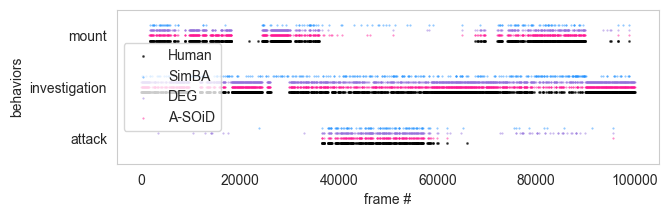

In [5]:
benchmark_algos = ['Human', 'SimBA', 'DEG', 'A-SOiD']
rows = 1
cols = 1
step = 50
seed_2_test = 1
behavioral_types = ['attack', 'investigation', 'mount', 'other']
fig, ax = plt.subplots(rows, cols, figsize=(7, 2))
ax.scatter(np.arange(0, 100000, step), targets_test[(targets_test<3)][:100000:step]-.1,
              s=1, c='k', alpha=0.6, label='human annotation')

ax.scatter(np.arange(0, 100000, step),
           labels_all_simba_seed2[seed_2_test][(targets_test<3)][:100000:step]+.2,
           s=0.2, c='dodgerblue', alpha=0.6, label='SimBA')

ax.scatter(np.arange(0, 100000, step),
           labels_all_deg_seed[seed_2_test][(targets_test<3)][:100000:step]+.1,
           s=0.2, c='mediumpurple', alpha=0.6, label='deepethogram')

ax.scatter(np.arange(0, 100000, step),
           predictions_list[-1][seed_2_test][(targets_test<3)][:100000:step],
           s=0.2, c='deeppink', alpha=0.6, label='a-soid')


ax.set_ylabel('behaviors')
ax.set_yticks(np.arange(4))
ax.set_yticklabels(behavioral_types)
ax.set_ylim([-.5, 2.5])
ax.set_xlabel('frame #')
ax.legend(benchmark_algos)
ax.grid(False)

plt.show()